# MODEL BUILDING

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Import Dataset
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wyMKES9Nu0ssdZBflzTMLH6il04W-_mSWVUfp5BVbtzn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetection-donotdelete-pr-ik9snay8exs5bp'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds = pd.read_csv(body)
ds.head()



,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
ds.tail()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,11055,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [6]:
ds.shape

(11055, 32)

In [7]:
ds.dtypes

index                          int64
having_IPhaving_IP_Address     int64
URLURL_Length                  int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [8]:
#missig values
ds.isna().any().sum()

0

In [9]:
ds.isna().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [10]:
#statistical anlaysis fo data

ds.describe().T

,count,mean,std,min,25%,50%,75%,max
index,11055.0,5528.000000,3191.447947,1.0,2764.5,5528.0,8291.5,11055.0
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0


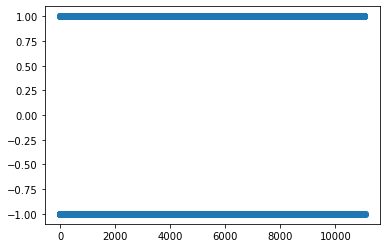

In [11]:
#scatterplot
plt.scatter(ds['index'],ds['Result'])

In [12]:
ds=pd.get_dummies(ds,columns=['Statistical_report'])

In [13]:
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Result,Statistical_report_-1,Statistical_report_1
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,-1,1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,-1,-1,0,-1,1,1,-1,0,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,0,-1,1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,-1,0,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,-1,0,-1,1,1,1,0,1


In [14]:
#split the into X and y
x=ds.drop(columns=['Result']).values
y=ds['Result'].values

In [15]:
x

array([[    1,    -1,     1, ...,     1,     1,     0],
       [    2,     1,     1, ...,     1,     0,     1],
       [    3,     1,     0, ...,     0,     1,     0],
       ...,
       [11053,     1,    -1, ...,     0,     0,     1],
       [11054,    -1,    -1, ...,     1,     0,     1],
       [11055,    -1,    -1, ...,     1,     1,     0]])

In [16]:
y

array([-1, -1, -1, ..., -1, -1, -1])

In [17]:
#spliting the datya train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
#predcit on the test data

pred_test=lr.predict(x_test)

pred_test


array([ 1,  1,  1, ...,  1,  1, -1])

In [21]:
#predccition in the train data 

pred_train=lr.predict(x_train)

pred_train

array([ 1,  1, -1, ...,  1,  1,  1])

In [22]:
#Accuracy 

from sklearn import metrics

In [23]:
metrics.accuracy_score(y_test,pred_test)

0.9181365897783809

In [24]:

lr_train = accuracy_score(y_train,pred_train)
lr_test = accuracy_score(y_test,pred_test)

print("Accuracy on training Data: {:.3f}".format(lr_train))
print("Accuracy on test Data: {:.3f}".format(lr_test))

Accuracy on training Data: 0.926
Accuracy on test Data: 0.918


# Random Forest Regression / Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
#prediction on the test data
RF_pred_test=RF.predict(x_test)

RF_pred_test

array([ 1,  1,  1, ...,  1,  1, -1])

In [28]:
#predccition in the train data 

RF_pred_train=RF.predict(x_train)

RF_pred_train

array([ 1,  1, -1, ...,  1,  1,  1])

In [29]:
## Accuracy of DT model 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,RF_pred_test)

0.9674355495251018

In [30]:
RF_train = accuracy_score(y_train,RF_pred_train)
RF_test = accuracy_score(y_test,RF_pred_test)

print("Accuracy on training Data: {:.3f}".format(RF_train))
print("Accuracy on test Data: {:.3f}".format(RF_test))

Accuracy on training Data: 1.000
Accuracy on test Data: 0.967


In [31]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,RF_pred_test)

array([[ 919,   44],
       [  28, 1220]])

# Decision Tree Regression / Classification

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
#prediction on test data

DTC_pred_test=DTC.predict(x_test)

DTC_pred_test

array([ 1,  1,  1, ...,  1,  1, -1])

In [35]:
#predccition in the train data 

DTC_pred_train=RF.predict(x_train)

DTC_pred_train

array([ 1,  1, -1, ...,  1,  1,  1])

In [36]:
# Accuracy of DT model 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,DTC_pred_test)

0.9547715965626413

# K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
#prediction on test data

pred_test=KNN.predict(x_test)

pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
#predccition in the train data 

pred_train=KNN.predict(x_train)

In [41]:
# Accuracy of KNN model
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred_test)

0.5902306648575305

# Support Vector Machine

In [42]:
from sklearn import svm

In [43]:
#initialize the model

smodel=svm.SVC(kernel='linear')

In [44]:
#fitting the model

smodel.fit(x_train,y_train)

SVC(kernel='linear')

In [45]:
#predict

mscv_train=smodel.predict(x_train)
mscv_test=smodel.predict(x_test)

In [46]:
#accuracy the model

from sklearn.metrics import accuracy_score,confusion_matrix

In [47]:
acc_train_svm = accuracy_score(y_train,mscv_train)
acc_test_svm = accuracy_score(y_test,mscv_test)

print("Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("Accuracy on test Data: {:.3f}".format(acc_test_svm))

Accuracy on training Data: 0.932
Accuracy on test Data: 0.926


### - svm For non linear data

In [48]:
#intialize the model

model1=svm.SVC(kernel='poly')

In [49]:
#fitting the model

model1.fit(x_train,y_train)

SVC(kernel='poly')

In [50]:
#predict

poly_pred_test=model1.predict(x_test)
poly_pred_train=model1.predict(x_train)

In [51]:
#accuracy

accuracy_score(y_test,poly_pred_test)

0.5644504748982361

In [52]:
#accuracy 
acc_train_svm = accuracy_score(y_train,poly_pred_train)
acc_test_svm = accuracy_score(y_test,poly_pred_test)

print("Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("Accuracy on test Data: {:.3f}".format(acc_test_svm))

Accuracy on training Data: 0.555
Accuracy on test Data: 0.564


# Watson Studio

In [54]:
pip install ibm_watson_machine_learning

Note: you may need to restart the kernel to use updated packages.


In [55]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url":"https://us-south.ml.cloud.ibm.com",
                 "apikey":"q7UkElOGb4lL4CAYrafQ-vbaRtJ4jr7mj8Z9nz9BT8Fv"
                }
client=APIClient(wml_credentials)

In [56]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [58]:
space_uid =guid_from_space_name(client,'ModelDeployment')
print ('Space ID = '+space_uid)

Space ID = 2b8ca4e2-526b-4581-96a7-92c646d95160


In [59]:
client.set.default_space(space_uid)

'SUCCESS'

In [60]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [67]:
software_spec_uid=client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [68]:
import sklearn
sklearn.__version__

'1.0.2'

In [72]:
model_details = client.repository.store_model(model=RF,meta_props={
 client.repository.ModelMetaNames.NAME:"modeldeployment",
 client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                          )
model_id = client.repository.get_model_id(model_details)

Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 254, in _save_scikit_pipeline_model
    model_artifact = self._create_pipeline_model(artifact, query_param)
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 514, in _create_pipeline_model
    model_artifact = self._create_pipeline_model_v4_cloud(model_artifact, query_param)
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 1005, in _create_pipeline_model_v4_cloud
    model_output = self.repository_api.ml_assets_model_creation_v4_cloud(model_input, query_param,headers)
  File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/libs/repo/swagger_client/apis/repository_api.py", line 301,

WMLClientError: Publishing model failed.
Reason: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Sun, 20 Nov 2022 13:05:03 GMT', 'Content-Type': 'application/json', 'Content-Length': '292', 'Connection': 'keep-alive', 'server-timing': 'intid;desc=2c5e0f851256780b, intid;desc=2c5e0f851256780b', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '76d16519eb98e474-DFW'})
HTTP response body: {
  "trace": "89c91b989c7e9dd67b696ac909e8072a",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported software specification 'default_py3.7'.",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


# Saving the model

In [53]:
import pickle
pickle.dump(RF,open('Phishing_Website.pkl','wb'))